**Employee Attrition Analysis**

*Introduction*

Employee attrition is defined as employees leaving their organizations for unpredictable or uncontrollable reasons. Various factors are directly or indirectly responsible for attrition. They include lack of professional growth, hostile work environment, or declining confidence in the company’s market value. Weak leadership is another factor that often drives attrition among employees.

*Objective*

The aim of this data science project is to figure out the possible reasons with high probability that leads to increasing attrition in a company. By analysis the provided data, the project is able deliver a predictive model to determine attrition of an employee. Furthermore, the project also aids the companies to find the accurate results and analyse to improve their attrition issues

Factors that affect attrition:
1. EmployeeID                  
2. Age                         
3. Attrition                   
4. BusinessTravel              
5. Department                  
6. DistanceFromHome
7. Education                   
8. EducationField              
9. EmployeeCount               
10. Gender                      
11. JobLevel                    
12. JobRole                     
13. MaritalStatus               
14. MonthlyIncome               
15. NumCompaniesWorked         
19. Over18                      
20. PercentSalaryHike           
21. StandardHours               
22. StockOptionLevel            
23. TotalWorkingYears           
24. TrainingTimesLastYear       
25. YearsAtCompany              
26. YearsSinceLastPromotion     
27. YearsWithCurrManager        
28. EnvironmentSatisfaction   
29. JobSatisfaction            
30. WorkLifeBalance            
31. JobInvolvement              
32. PerformanceRating 

**1. Import Libraries**

All necessary libraries are imported that are pre-requisites for the project.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder

**2. Data Acquisition and Inspection**

Dataset is acquired using pandas library and evaluated.

In [2]:
df = pd.read_csv('Attrition data.csv')

In [3]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [4]:
df.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [6]:
df.shape

(4410, 29)

In [7]:
df.isnull().any()

EmployeeID                 False
Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
EnvironmentSatisfaction     True
JobSatisfaction             True
WorkLifeBalance             True
JobInvolvement             False
PerformanceRating          False
dtype: bool

In [8]:
df.value_counts

<bound method DataFrame.value_counts of       EmployeeID  Age Attrition     BusinessTravel              Department  \
0              1   51        No      Travel_Rarely                   Sales   
1              2   31       Yes  Travel_Frequently  Research & Development   
2              3   32        No  Travel_Frequently  Research & Development   
3              4   38        No         Non-Travel  Research & Development   
4              5   32        No      Travel_Rarely  Research & Development   
...          ...  ...       ...                ...                     ...   
4405        4406   42        No      Travel_Rarely  Research & Development   
4406        4407   29        No      Travel_Rarely  Research & Development   
4407        4408   25        No      Travel_Rarely  Research & Development   
4408        4409   42        No      Travel_Rarely                   Sales   
4409        4410   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome 

*Observation*
1. The dataset contains 4410 records of employees.
2. It contains 28 determining features.
3. The mean age is around 37 years.
4. The average monthly income is 65000.
5. Five features contain null values that needs to be cleaned.

**3. Data Cleaning**

As the isnull() function showed results with five columns containing null values, it becomes necessary for us to modify those values so that our we are able to create a proper working model.

Using the mean imputation method, the null values in five columns are replaced by their mean values.

In [9]:
df['EnvironmentSatisfaction'] = pd.to_numeric(df['EnvironmentSatisfaction'], errors='coerce')
mean_value1 = df['EnvironmentSatisfaction'].mean()
mean_value1 = int(mean_value1)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].fillna(value=mean_value1)


In [10]:
df['JobSatisfaction'] = pd.to_numeric(df['JobSatisfaction'] ,errors='coerce')
mean_value2 = df['JobSatisfaction'].mean()
mean_value2 = int(mean_value2)
df['JobSatisfaction'] = df['JobSatisfaction'].fillna(value=mean_value2)

In [11]:
df['WorkLifeBalance'] = pd.to_numeric(df['WorkLifeBalance'] ,errors='coerce')
mean_value3 = df['WorkLifeBalance'].mean()
mean_value3 = int(mean_value3)
df['WorkLifeBalance'] = df['WorkLifeBalance'].fillna(value=mean_value3)

In [12]:
df['NumCompaniesWorked'] = pd.to_numeric(df['NumCompaniesWorked'] ,errors='coerce')
mean_value4 = df['NumCompaniesWorked'].mean()
mean_value4 = int(mean_value4)
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(value=mean_value4)

In [13]:
df['TotalWorkingYears'] = pd.to_numeric(df['TotalWorkingYears'] ,errors='coerce')
mean_value5 = df['TotalWorkingYears'].mean()
mean_value5 = int(mean_value5)
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(value=mean_value5)

In [14]:
df.isnull().sum()

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

The dataset no more contains null values as mean imputations has been made in all the columns that previously contained null values.

**4. Exploratory Data Analysis**

The current dataset with no null values can be visualized using the *matplotlib* and *seaborn* libraries to give vivid pictures of the information. EDA helps us understand our data more accurately and work in a more organized manner.

In [15]:
#Creating a seperate dataframe that only contains rows with Attrition values yes
attr_df = df[df["Attrition"]=='Yes']
attr_df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
6,7,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,Male,...,5.0,2,0,0,0,1.0,3.0,1.0,3,4
13,14,47,Yes,Non-Travel,Research & Development,1,1,Medical,1,Male,...,10.0,4,10,9,9,1.0,2.0,2.0,2,3
28,29,44,Yes,Travel_Frequently,Research & Development,1,2,Medical,1,Male,...,19.0,2,1,0,0,4.0,3.0,1.0,2,3
30,31,26,Yes,Travel_Rarely,Research & Development,4,3,Medical,1,Male,...,5.0,5,3,0,2,1.0,2.0,3.0,2,3


<Axes: title={'center': 'Attrition among the Departments'}, xlabel='Department', ylabel='count'>

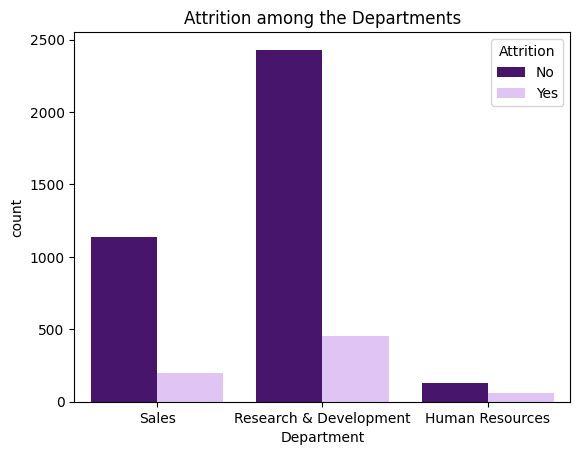

In [16]:
plt.title("Attrition among the Departments")
my_palette = ['#49067B','#E1BCFC']
sns.countplot(df, x="Department", hue="Attrition", palette=my_palette)

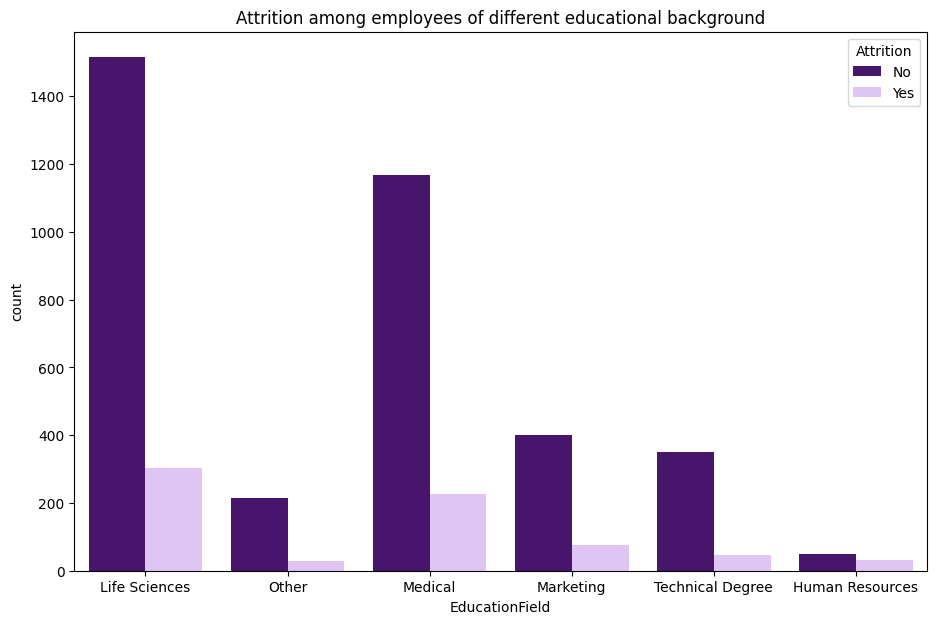

In [17]:
fig, ax = plt.subplots(figsize=(11,7))
plt.title("Attrition among employees of different educational background")
my_palette = ['#49067B','#E1BCFC']
sns.countplot(df, x="EducationField", hue="Attrition", palette=my_palette)
plt.show()

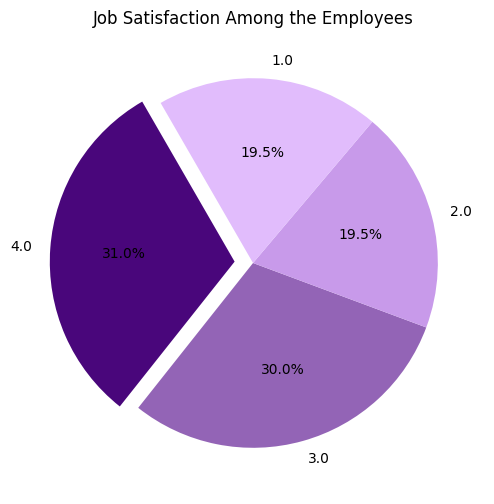

In [18]:
js_counts = df['JobSatisfaction'].value_counts()
plt.figure(figsize=(6, 6))
my_palette = ['#49067B','#9364B6','#C89AEA','#E1BCFC']
explode = (0.1,0,0,0)
plt.pie(js_counts, labels=js_counts.index, explode = explode, autopct='%1.1f%%', colors=my_palette, startangle=120)
plt.title("Job Satisfaction Among the Employees")
plt.show()

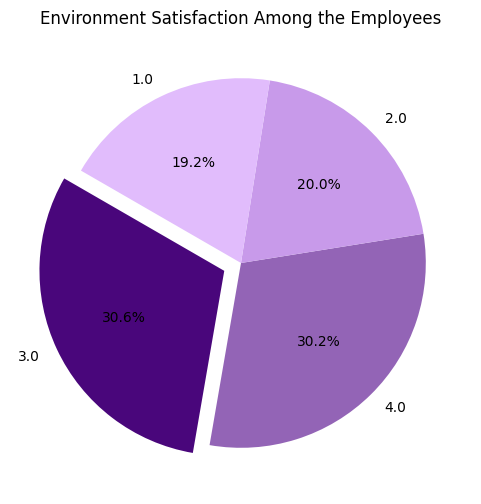

In [19]:
es_counts = df['EnvironmentSatisfaction'].value_counts()
plt.figure(figsize=(6, 6))
my_palette = ['#49067B','#9364B6','#C89AEA','#E1BCFC']
explode = (0.1,0,0,0)
plt.pie(es_counts, labels=es_counts.index, explode = explode, autopct='%1.1f%%', colors=my_palette, startangle=150,)
plt.title("Environment Satisfaction Among the Employees")
plt.show()

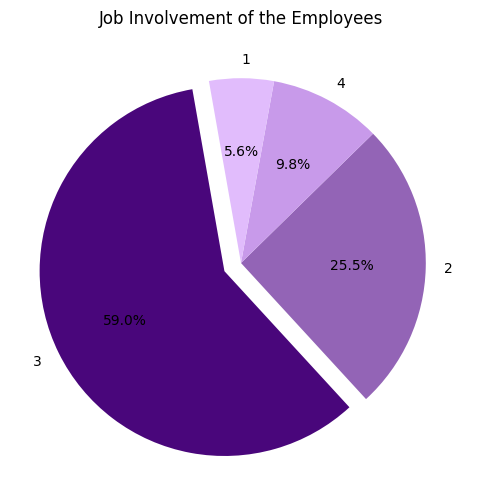

In [20]:
ji_counts = df['JobInvolvement'].value_counts()
plt.figure(figsize=(6, 6))
my_palette = ['#49067B','#9364B6','#C89AEA','#E1BCFC']
explode = (0.1,0,0,0)
plt.pie(ji_counts, labels=ji_counts.index, explode = explode, autopct='%1.1f%%', colors=my_palette, startangle=100)
plt.title("Job Involvement of the Employees")
plt.show()

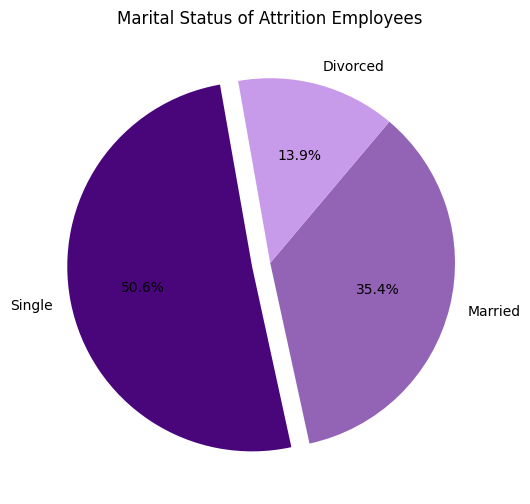

In [21]:
ms_counts = attr_df['MaritalStatus'].value_counts()
plt.figure(figsize=(6, 6))
my_palette = ['#49067B','#9364B6','#C89AEA','#E1BCFC']
explode = (0.1,0,0)
plt.pie(ms_counts, labels=ms_counts.index, explode = explode, autopct='%1.1f%%', colors=my_palette, startangle=100)
plt.title("Marital Status of Attrition Employees")
plt.show()

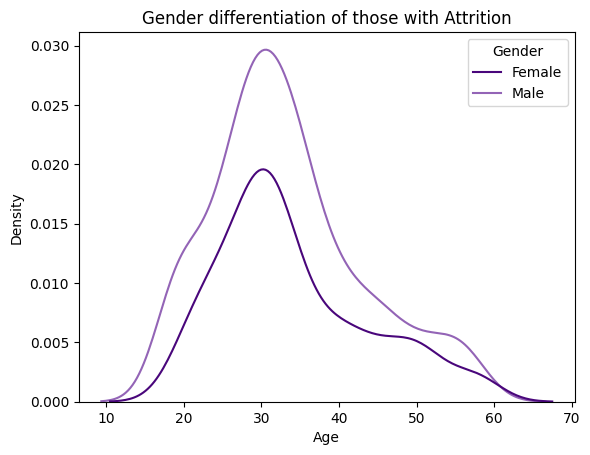

In [22]:
sns.kdeplot(attr_df, x="Age", hue="Gender", palette=my_palette)
my_palette = ['#720CBD','#9364B6']
plt.title("Gender differentiation of those with Attrition")
plt.show()

Text(0.5, 1.0, 'Monthly Income of those with Attrition')

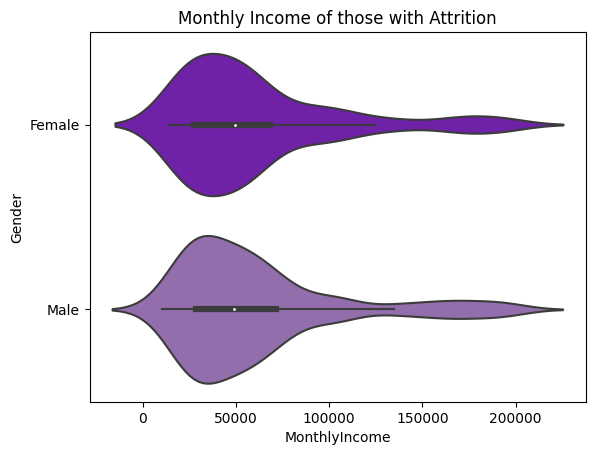

In [23]:
sns.violinplot(attr_df, x="MonthlyIncome", y="Gender", palette=my_palette)
my_palette = {'Female':'#49067B','Male':'#9364B6'}
plt.title("Monthly Income of those with Attrition")

Text(0.5, 1.0, 'Total Working Years vs Years At Company')

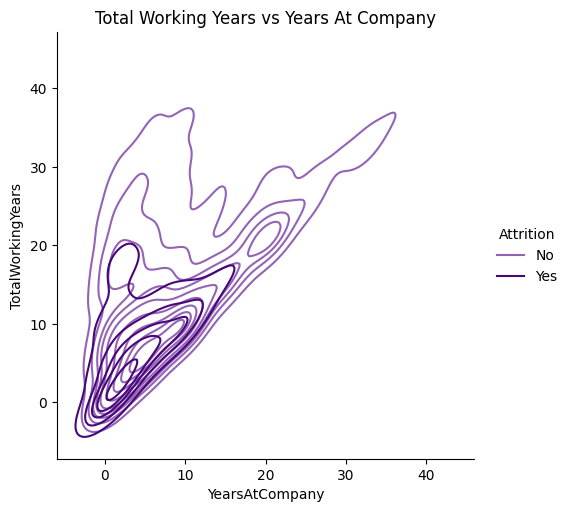

In [24]:
my_palette = {'Yes':'#49067B','No':'#9364B6'}
sns.displot(df, x="YearsAtCompany", y="TotalWorkingYears", kind="kde", hue="Attrition", palette=my_palette)
plt.title("Total Working Years vs Years At Company")

In [25]:
df['JobRole'].unique()

array(['Healthcare Representative', 'Research Scientist',
       'Sales Executive', 'Human Resources', 'Research Director',
       'Laboratory Technician', 'Manufacturing Director',
       'Sales Representative', 'Manager'], dtype=object)

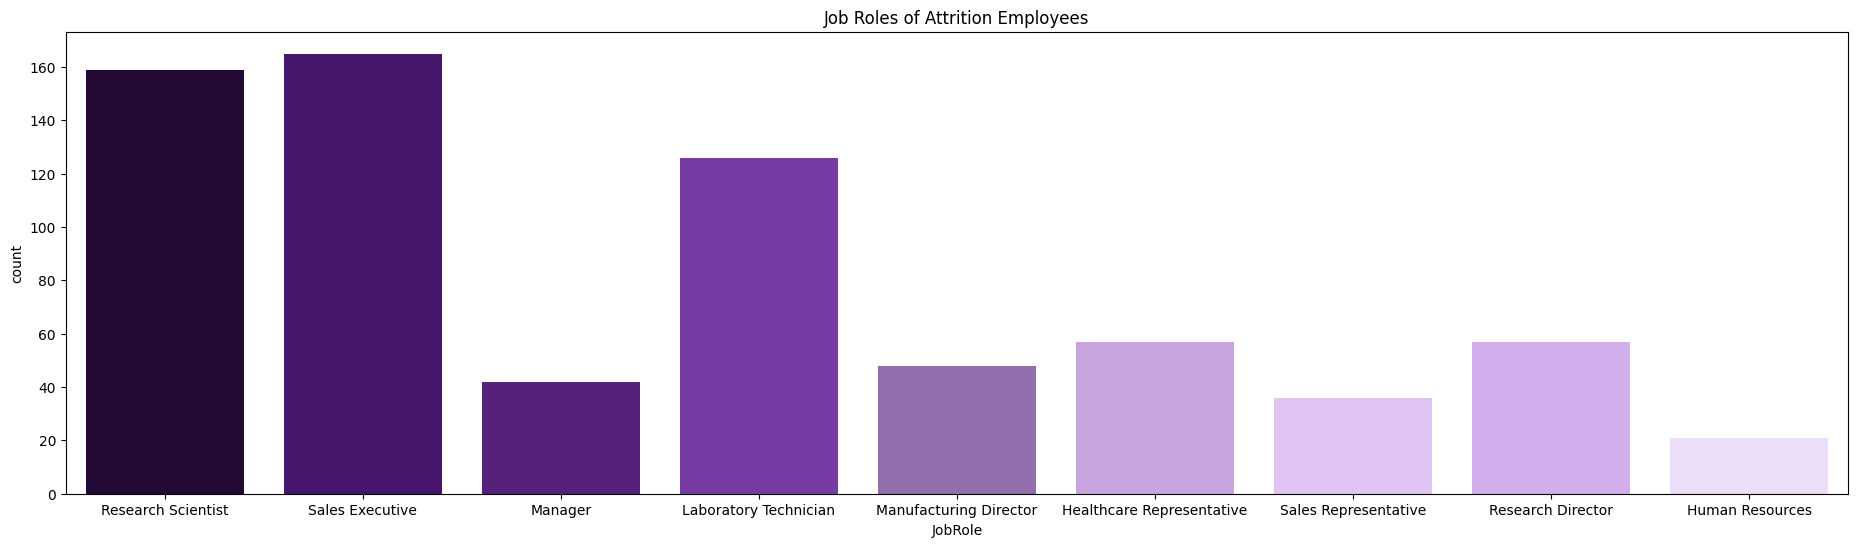

In [26]:
fig, ax= plt.subplots(figsize=(23,6))
my_palette = {'Research Scientist':'#24033D','Sales Executive':'#49067B','Manager':'#57128A','Laboratory Technician':'#7A2BB5','Manufacturing Director':'#9364B6','Healthcare Representative':'#C89AEA','Sales Representative':'#E1BCFC','Research Director':'#D3A4F7','Human Resources':'#EDD8FD'}
sns.countplot(attr_df, x="JobRole", palette=my_palette)
plt.title("Job Roles of Attrition Employees")
plt.show()

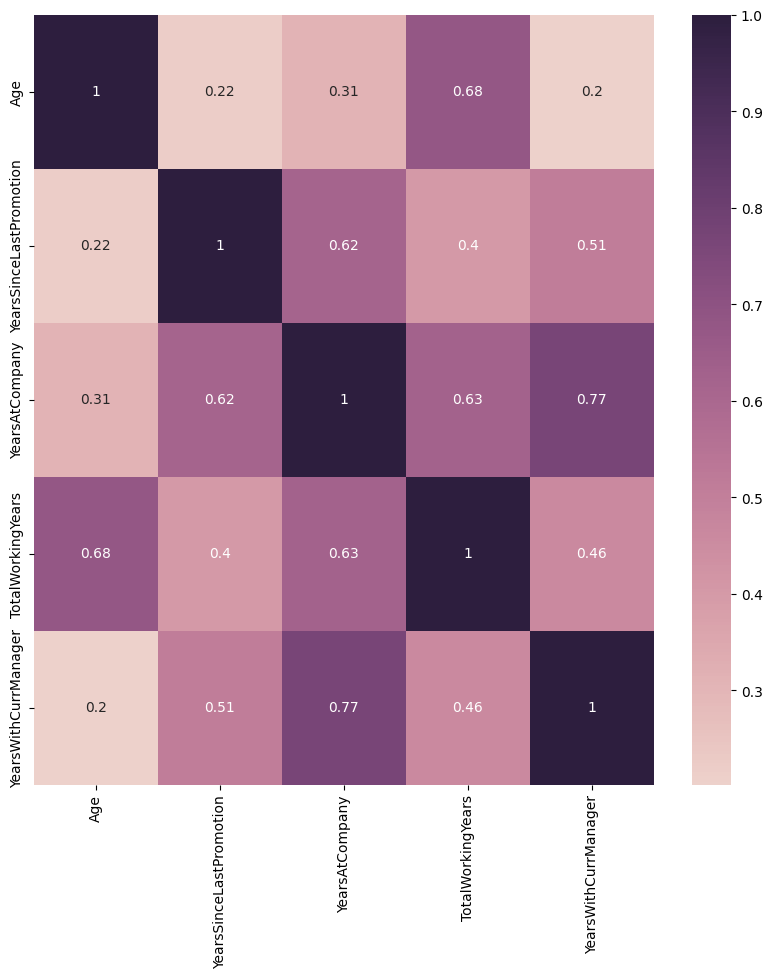

In [27]:
simple_df = df[['Age','YearsSinceLastPromotion','YearsAtCompany','TotalWorkingYears','YearsWithCurrManager']]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(simple_df.corr(),cmap=sns.cubehelix_palette(as_cmap=True),annot=True)
plt.show()


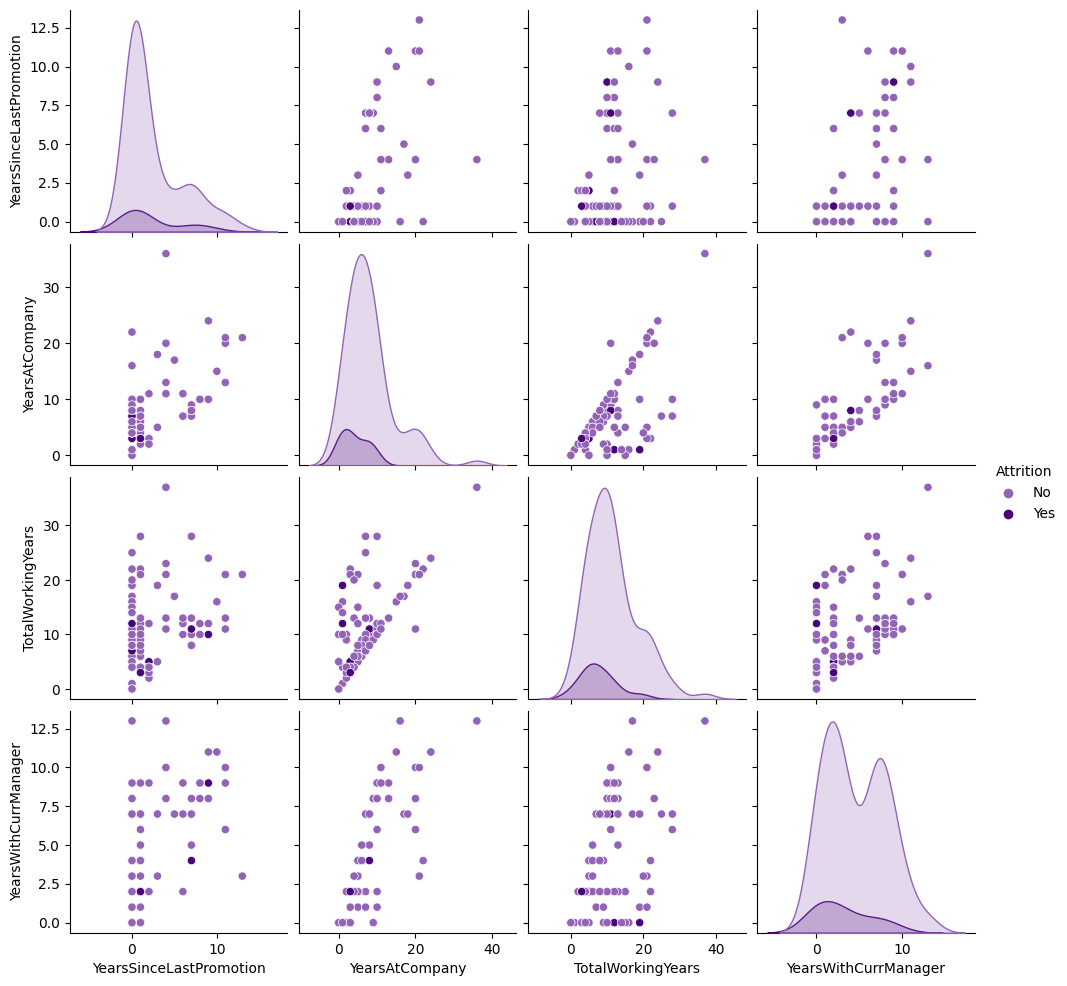

In [28]:
simple_df = df[['YearsSinceLastPromotion','YearsAtCompany','TotalWorkingYears','YearsWithCurrManager','Attrition']]
my_palette = {'Yes':'#49067B','No':'#9364B6'}
sns.pairplot(simple_df.head(100), hue="Attrition",palette=my_palette)

**5. Label Encoding**

Label Encoding is a technique used to convert data containing more categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data.

In [29]:
label_encode = LabelEncoder()

In [30]:
df['Department'] = label_encode.fit_transform(df['Department'])
df['EducationField'] = label_encode.fit_transform(df['EducationField'])
df['JobRole'] = label_encode.fit_transform(df['JobRole'])
df['MaritalStatus'] = label_encode.fit_transform(df['MaritalStatus'])
df['BusinessTravel'] = label_encode.fit_transform(df['BusinessTravel'])
df['Gender']=df['Gender'].replace({'Male':0, 'Female':0})
df['Over18']=df['Over18'].replace({'N':0, 'Y':1})
df['Attrition']=df['Attrition'].replace({'Yes':1, 'No':0})

In [31]:
pd.set_option('display.max_columns', None)
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,0,2,2,6,2,1,1,0,1,0,1,131160,1.0,1,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,1,1,1,10,1,1,1,0,1,6,2,41890,0.0,1,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,0,1,1,17,4,4,1,0,4,7,1,193280,1.0,1,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,0,0,1,2,5,1,1,0,3,1,1,83210,3.0,1,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,0,2,1,10,1,3,1,0,1,7,2,23420,4.0,1,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


**6. Training the Model**

The dataset then split into two parts: one for training and one for testing using the train_test_split function.

In [32]:
x = df[[ 'EmployeeID','Age', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating']]
y= df['Attrition']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=29,test_size=0.3)
x_train.head()

,EmployeeID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
4037,4038,36,2,1,13,3,5,1,0,3,0,1,25170,2.0,1,14,8,0,12.0,3,4,1,3,3.0,2.0,1.0,3,3
592,593,32,0,1,11,2,4,1,0,2,6,0,44870,1.0,1,11,8,0,1.0,5,1,0,0,3.0,1.0,3.0,2,3
2986,2987,39,2,2,5,4,2,1,0,2,1,0,21050,0.0,1,20,8,0,19.0,3,18,3,7,3.0,4.0,2.0,3,4
1077,1078,39,2,1,2,3,5,1,0,3,0,0,102520,8.0,1,13,8,1,7.0,3,2,2,2,2.0,4.0,3.0,3,3
1141,1142,43,2,1,3,3,3,1,0,1,6,1,90940,1.0,1,12,8,1,10.0,0,10,0,9,1.0,3.0,3.0,3,3


**7. Fitting the Model**

We are going to try 4 different models:
1. Logistic Regression
2. Gradient Boosting Machine
3. Support Vector Machine
4. Random Forest Classifier

In [34]:
model1 = LogisticRegression()
model2 = SVC()
model3 = RandomForestClassifier()
model4 = xgb.XGBClassifier()
model5 = GaussianNB()

In [35]:
model_types = {model1,model2,model3,model4,model5}

Accuracy score is determined to choose the best model.

In [36]:
for model in model_types:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Model :", model)
    print("Accuracy Score :", accuracy_score(y_test,y_pred))

Model : SVC()
Accuracy Score : 0.8533635676492819
Model : GaussianNB()
Accuracy Score : 0.8578987150415722
Model : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy Score : 0.9909297052154195
Model : RandomForestClassifier()
Accuracy Score : 0.9931972789115646
Model : LogisticRegres

XGB Classifier model proves to have the highest accuracy score. Thus it is chosen.

In [37]:
roc_score = roc_auc_score(y_test,y_pred)
print("The ROC-AUC Score:",roc_score)

The ROC-AUC Score: 0.5


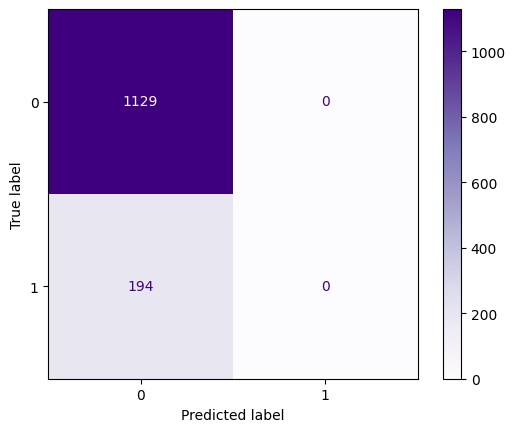

In [38]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model4.classes_)
disp.plot(cmap=plt.cm.Purples)
plt.show()

In [39]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1129
           1       0.00      0.00      0.00       194

    accuracy                           0.85      1323
   macro avg       0.43      0.50      0.46      1323
weighted avg       0.73      0.85      0.79      1323



In [40]:
#Testing with a random sample
x_new = x.sample(1)
x_new

,EmployeeID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
4344,4345,35,2,1,2,4,1,1,0,2,5,1,108830,3.0,1,12,8,0,8.0,3,1,0,1,2.0,3.0,3.0,4,3


In [41]:
result = model4.predict(x_new)
if result[0]==0:
    print("The person has not left the company.")
else:
    print("The person has left the company. ")

The person has left the company. 


**8. Feature Scaling**

Feature Scaling is done to determine the best features that contribute towards the performance of the predictive model.

In [42]:
coefficients = model4.feature_importances_
features = x_train.columns
for feature, coefficient in zip(features, coefficients):
    print("Feature:",feature,"Score:", coefficient)

Feature: EmployeeID Score: 0.010156471
Feature: Age Score: 0.050510764
Feature: BusinessTravel Score: 0.045100916
Feature: Department Score: 0.056937966
Feature: DistanceFromHome Score: 0.037273787
Feature: Education Score: 0.03917186
Feature: EducationField Score: 0.039293915
Feature: EmployeeCount Score: 0.0
Feature: Gender Score: 0.0
Feature: JobLevel Score: 0.027459377
Feature: JobRole Score: 0.032810424
Feature: MaritalStatus Score: 0.07538341
Feature: MonthlyIncome Score: 0.04569144
Feature: NumCompaniesWorked Score: 0.058485724
Feature: Over18 Score: 0.0
Feature: PercentSalaryHike Score: 0.034941427
Feature: StandardHours Score: 0.0
Feature: StockOptionLevel Score: 0.025094043
Feature: TotalWorkingYears Score: 0.054737113
Feature: TrainingTimesLastYear Score: 0.04700579
Feature: YearsAtCompany Score: 0.06254656
Feature: YearsSinceLastPromotion Score: 0.043045137
Feature: YearsWithCurrManager Score: 0.048292633
Feature: EnvironmentSatisfaction Score: 0.04219042
Feature: JobSatisf

Text(0.5, 1.0, 'The Top 5 Determining Features')

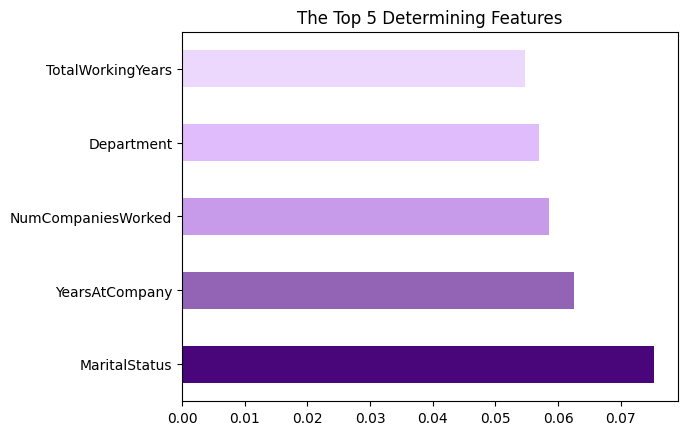

In [43]:
my_palette = ['#49067B','#9364B6','#C89AEA','#E1BCFC','#EDD8FD']
(pd.Series(model4.feature_importances_, index=x.columns)
   .nlargest(5)
   .plot(kind='barh', color=my_palette))
plt.title("The Top 5 Determining Features")

**9. Hyper-Parameter Tuning**

Hyperparameter tuning helps us to control the model features and performance. It helps in increasing the efficiency of the model and providing optimal results.


In [44]:
param_grid = {
    'n_estimators':[50,100,150],
    'max_depth':['sqrt', 'log2', None],
    'min_samples_split':[3,6,9],
    'min_samples_leaf':[3,6,9]
}


In [45]:
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid=param_grid)

In [46]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': ['sqrt', 'log2', None],
                         'min_samples_leaf': [3, 6, 9],
                         'min_samples_split': [3, 6, 9],
                         'n_estimators': [50, 100, 150]})

In [47]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 150}

In [48]:
bestmodel = grid_search.best_estimator_
y_pred = bestmodel.predict(x_test)

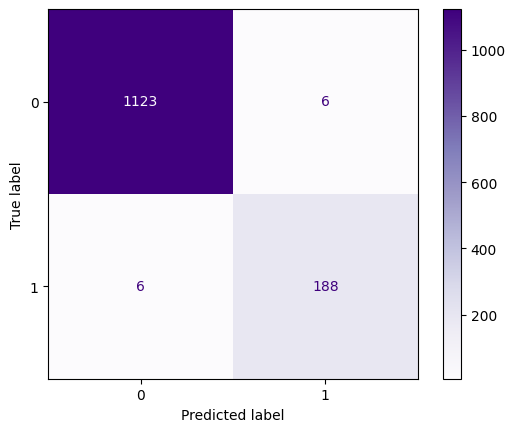

In [49]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Purples)
plt.show()

In [50]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1129
           1       0.97      0.97      0.97       194

    accuracy                           0.99      1323
   macro avg       0.98      0.98      0.98      1323
weighted avg       0.99      0.99      0.99      1323



**Conclusion:**

1. The most influential factors that can lead to attrition are the number of companies worked, total working years, the department they are working under, marital status and total years at the company.
2. The XGBoost gradient boosting classifier had provided the highest accuracy score and hence chosen for the predictive model.
3. This predictive model is efficient and reliable.